In [79]:
#importing necessary modules for this Analysis

import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
#The following stages we peform some data preparation

In [119]:
#Extracting date from our data
def Date_time(d):
    pattern = '^\[([0-9]+)([\/-])([0-9]+)([\/-])([0-9]+)[,]? ([0-9]+):([0-9][0-9]):([0-9][0-9])[ ]?(AM|PM|am|pm)?\]'
    result = re.match(pattern, d)
    if result:
        return True
    return False

In [120]:
#Extracting Authors from our data
def FindAuthor(a):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, a)
    if result:
        return True
    return False

In [121]:
#Extracting Date, Time, Author and message from the chat file.
def getIndividualChat(chat):   
    splitchat = chat.split('] ')
    dateTime = splitchat[0]
    if ',' in dateTime:
      date, time = dateTime.split(',') 
    else:
      date, time = dateTime.split(' ') 
    message = ' '.join(splitchat[1:])
    if getIndividualChat(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [84]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = '/Users/khuger/Desktop/whatsapp chart analysis/Badookers_Group_Chart.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline()
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line: 
            break 
        line = line.strip()
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
          line= (line.encode('ascii', 'ignore')).decode("utf-8")
          if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
          else:
            messageBuffer.append(line)

In [122]:
#Creating DataFrame and storing info inside that data Frame
import datetime
def dateconv(date):
      year=''           
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = df["Date"].apply(dateconv)
df["Date"] = pd.to_datetime(df["Date"])
                    
                
            
        


    

    

    
 




In [123]:
df.head(3)   #Calling our dataFrame to see how our data is organised now

,Date,Time,Author,Message
0,NaT,20:12:27,Alex,"Based on your exemplary social skills, the imp..."
1,NaT,20:12:52,Charlotte,sticker omitted
2,NaT,20:13:31,TK,sticker omitted


In [124]:
df.info() # Checking basic information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     0 non-null      datetime64[ns]
 1   Time     5546 non-null   object        
 2   Author   5543 non-null   object        
 3   Message  5546 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 173.4+ KB


In [49]:
df.Author.unique() # Checking authors of group

array(['Alex', 'Charlotte', 'TK', 'Cassie', 'Somo', 'Dee', 'Owen',
       'Tsungie MSF', 'Samantha Uct', 'Tich', 'Ndina',
       'Wisani Buti Mushwana', 'Arnold Uct', 'Maur', None], dtype=object)

In [50]:
df = df.dropna() # Droping Nan values from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     0 non-null      datetime64[ns]
 1   Time     0 non-null      object        
 2   Author   0 non-null      object        
 3   Message  0 non-null      object        
dtypes: datetime64[ns](1), object(3)
memory usage: 0.0+ bytes


In [89]:
total_messages = df.shape[0] # Total Number of messages in the Group Chat
print(total_messages)

5546


In [126]:
messages_with_media = df[df['Message'] == 'image omitted'].shape[0] # Total number of messages that contain media
print(messages_with_media)

58


In [127]:
# Counts the number of emojis in the group

def split_count(text):
    emoji_list = []
    data = regex.findall(r'\X',text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI['en'] for char in word):
            emoji_list.append(word)
    return emoji_list
df['emoji'] = df["Message"].apply(split_count)

emojis = sum(df['emoji'].str.len())
print(emojis)

7498


In [132]:
#Creates a DF for URL
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()

In [133]:
links = np.sum(df.urlcount) #counts the number of links


In [134]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 5546
Media: 58
Emojis: 7498
Links: 15


In [135]:
media_messages_df = df[(df['Message'] == 'image omitted')|(df['Message'] == 'video omitted')]

In [136]:
sticker_messages_df = df[df['Message'] == 'sticker omitted']
sticker_messages_df

,Date,Time,Author,Message,emoji,urlcount
1,NaT,20:12:52,Charlotte,sticker omitted,[],0
2,NaT,20:13:31,TK,sticker omitted,[],0
8,NaT,20:16:43,TK,sticker omitted,[],0
10,NaT,20:17:12,Alex,sticker omitted,[],0
14,NaT,20:24:30,Owen,sticker omitted,[],0
...,...,...,...,...,...,...
5479,NaT,15:44:12,Maur,sticker omitted,[],0
5485,NaT,16:54:05,Dee,sticker omitted,[],0
5489,NaT,16:59:37,Maur,sticker omitted,[],0
5495,NaT,17:10:59,Tich,sticker omitted,[],0


In [137]:
messages_df = df.drop(media_messages_df.index)
messages_df = messages_df.drop(sticker_messages_df.index)

In [138]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4863 entries, 0 to 5544
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      0 non-null      datetime64[ns]
 1   Time      4863 non-null   object        
 2   Author    4860 non-null   object        
 3   Message   4863 non-null   object        
 4   emoji     4863 non-null   object        
 5   urlcount  4863 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 265.9+ KB


In [139]:

messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [100]:
messages_df.tail(2)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
5542,NaT,11:38:50,Samantha Uct,When 💃🏽💃🏽💃🏽,"[💃🏽, 💃🏽, 💃🏽]",0,11,2,1
5544,NaT,11:38:57,Dee,It’s her long paragraphs 😂😂😂,"[😂, 😂, 😂]",0,28,5,1


In [140]:
messages_df["emojicount"]= df['emoji'].str.len()

In [141]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #sticker conists of stickers messages
  stickers = sticker_messages_df[sticker_messages_df['Author'] == l[i]].shape[0]
  print('Sticker Messages Sent', stickers)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Alex -
Messages Sent 236
Words per message 11.372881355932204
Media Messages Sent 3
Sticker Messages Sent 37
Emojis Sent 241
Links Sent 0

Stats of TK -
Messages Sent 539
Words per message 5.282003710575139
Media Messages Sent 30
Sticker Messages Sent 54
Emojis Sent 623
Links Sent 5

Stats of Cassie -
Messages Sent 618
Words per message 7.67799352750809
Media Messages Sent 10
Sticker Messages Sent 27
Emojis Sent 1882
Links Sent 2

Stats of Somo -
Messages Sent 454
Words per message 5.288546255506608
Media Messages Sent 3
Sticker Messages Sent 140
Emojis Sent 398
Links Sent 0

Stats of Dee -
Messages Sent 385
Words per message 8.903896103896104
Media Messages Sent 6
Sticker Messages Sent 66
Emojis Sent 288
Links Sent 1

Stats of Samantha Uct -
Messages Sent 865
Words per message 10.778034682080925
Media Messages Sent 8
Sticker Messages Sent 6
Emojis Sent 1064
Links Sent 2

Stats of Tsungie MSF -
Messages Sent 546
Words per message 5.5256410256410255
Media Messages Sent 4
Sticke

/var/folders/0f/fcytp92x28n9wxb2ls2bq9d40000gn/T/ipykernel_12427/2943023706.py:12: RuntimeWarning:

invalid value encountered in long_scalars



In [142]:
messages_df=messages_df[messages_df["urlcount"]==0]

In [143]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

188


In [144]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 3046), ('🤣', 2012), ('🙊', 393), ('😭', 164), ('🥳', 150), ('😅', 145), ('🔥', 138), ('💃🏽', 126), ('💀', 77), ('🙌', 57), ('🙌🏾', 54), ('😱', 54), ('👀', 50), ('💅🏿', 50), ('😍', 43), ('💃', 43), ('🚮', 38), ('🏃🏿\u200d♂️', 37), ('🙈', 36), ('🤔', 29), ('🤦🏼\u200d♀️', 27), ('🤭', 27), ('🙏', 25), ('😄', 24), ('🙄', 23), ('🎉', 22), ('😩', 22), ('🙆\u200d♀️', 21), ('🥺', 20), ('🥰', 19), ('❤️', 18), ('😀', 16), ('🤗', 16), ('🙆🏽\u200d♀️', 16), ('😃', 15), ('😫', 14), ('🥂', 13), ('😬', 13), ('🤷🏽\u200d♀️', 12), ('🤦🏽\u200d♀️', 10), ('👏🏽', 10), ('😎', 10), ('😆', 10), ('🌚', 9), ('😁', 9), ('😏', 8), ('😞', 7), ('💃🏿', 7), ('✅', 7), ('🥲', 7), ('✨', 7), ('😘', 7), ('🌝', 6), ('😊', 6), ('💪🏽', 6), ('👌🏽', 6), ('😰', 6), ('🎤', 6), ('🤯', 5), ('🥸', 5), ('👆🏽', 5), ('😖', 5), ('😢', 4), ('😳', 4), ('🎊', 4), ('😒', 4), ('🧐', 4), ('🫂', 4), ('💃🏼', 4), ('✊🏾', 4), ('😵\u200d💫', 4), ('💯', 4), ('😋', 4), ('🤪', 4), ('😚', 4), ('🌸', 4), ('🍾', 3), ('😪', 3), ('💔', 3), ('🤩', 3), ('😇', 3), ('🤝', 3), ('🤐', 3), ('🌻', 3), ('🙏🏽', 3), ('👌', 3), ('🎄', 3), ('☺️

In [145]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,3046
1,🤣,2012
2,🙊,393
3,😭,164
4,🥳,150
...,...,...
183,💬,1
184,💡,1
185,🫠,1
186,🫡,1


In [146]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [147]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Alex


Emoji Distribution for TK


Emoji Distribution for Cassie


Emoji Distribution for Somo


Emoji Distribution for Dee


Emoji Distribution for Samantha Uct


Emoji Distribution for Tsungie MSF


Emoji Distribution for Ndina


Emoji Distribution for Wisani Buti Mushwana


Emoji Distribution for Owen


Emoji Distribution for Tich


Emoji Distribution for Charlotte


Emoji Distribution for Arnold Uct


Emoji Distribution for Maur


Emoji Distribution for None


In [149]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

Text(0, 0.5, 'Time')

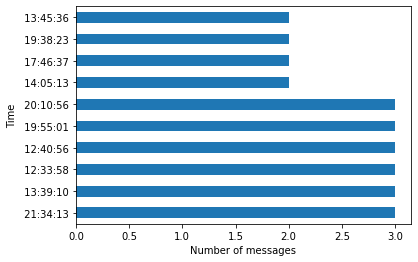

In [150]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [153]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                                          NaT
Time                                                     19:21:40
Author                                               Samantha Uct
Message         I know this makes sense in every theoretical v...
emoji                                                          []
urlcount                                                        0
Letter_Count                                                 5538
Word_Count                                                   1066
MessageCount                                                    1
emojicount                                                      0
Name: 2299, dtype: object

In [154]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 194287 words in all the messages.


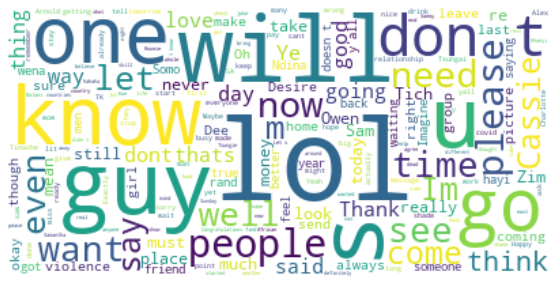

In [155]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni"])
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()